In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv",sep = ',')
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [4]:
# convert column to datetime pandas
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
# Create new columns
df['day'] = df['Date'].dt.day
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year

In [6]:
df.drop('Date',axis = 1,inplace = True)

In [14]:
df.dtypes

station             float64
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
day                 float64
month               float64
year                float64
dtype: object

In [15]:
# getting their shapes
print("Shape of train :", df.shape)

Shape of train : (7752, 27)


In [16]:
# describing the training set
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,day,month,year
count,7750.000000,7682.000000,7682.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,...,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7725.000000,7725.000000,7750.000000,7750.000000,7750.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,...,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220,16.370968,7.080645,2015.000000
std,7.211568,2.969999,2.413961,14.668111,7.192004,2.947191,2.345347,2.183836,33.730589,0.262458,...,0.050352,0.079435,54.279780,1.370444,429.158867,3.128010,2.487613,8.241331,2.238364,1.414305
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000,7.000000,1.000000,2013.000000
25%,7.000000,27.800000,21.700000,45.963543,84.222862,27.673499,22.089739,5.678705,37.266753,0.146654,...,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000,8.000000,7.000000,2014.000000
50%,13.000000,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,...,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000,16.000000,7.000000,2015.000000
75%,19.000000,32.000000,24.900000,67.190056,93.743629,31.710450,25.152909,8.032276,84.223616,0.575489,...,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000,24.000000,8.000000,2016.000000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000,31.000000,12.000000,2017.000000


In [17]:
# check the info of data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Present_Tmax      7682 non-null   float64
 2   Present_Tmin      7682 non-null   float64
 3   LDAPS_RHmin       7677 non-null   float64
 4   LDAPS_RHmax       7677 non-null   float64
 5   LDAPS_Tmax_lapse  7677 non-null   float64
 6   LDAPS_Tmin_lapse  7677 non-null   float64
 7   LDAPS_WS          7677 non-null   float64
 8   LDAPS_LH          7677 non-null   float64
 9   LDAPS_CC1         7677 non-null   float64
 10  LDAPS_CC2         7677 non-null   float64
 11  LDAPS_CC3         7677 non-null   float64
 12  LDAPS_CC4         7677 non-null   float64
 13  LDAPS_PPT1        7677 non-null   float64
 14  LDAPS_PPT2        7677 non-null   float64
 15  LDAPS_PPT3        7677 non-null   float64
 16  LDAPS_PPT4        7677 non-null   float64


In [18]:
# check null values training set
df.isnull().sum()

station              2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
day                  2
month                2
year                 2
dtype: int64

0.514100    310
0.266100    310
1.231300    310
0.572100    310
2.785000    310
2.257900    310
5.178200    310
0.505500    310
0.222300    310
2.686500    310
0.133200    310
1.562900    310
0.155400    310
2.534800    310
0.145700    310
0.855200    310
0.098500    310
0.697000    310
0.593100    310
1.767800    310
0.412500    310
0.618000    310
0.271300    310
4.729600    310
0.623300    310
0.098475      1
5.178230      1
Name: Slope, dtype: int64

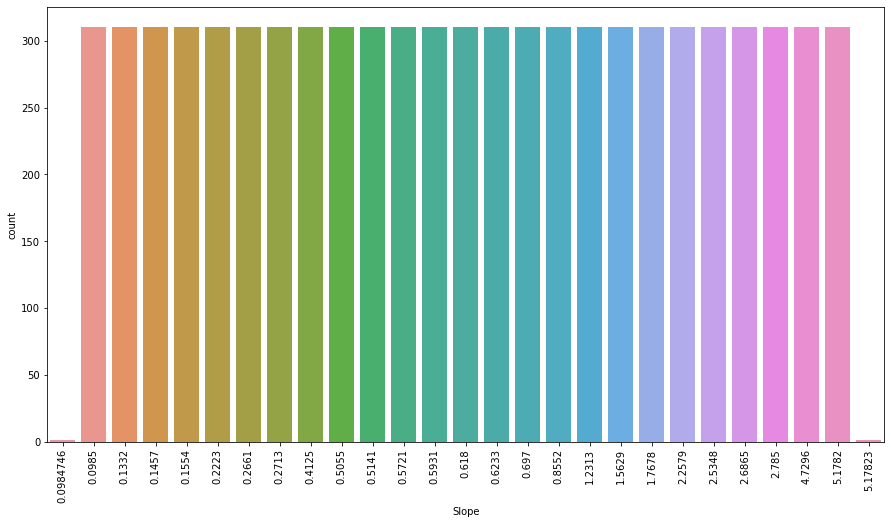

In [25]:
plt.figure(figsize=(15,8))
sns.countplot(x='Slope',data=df)
plt.xticks(rotation=90)
df['Slope'].value_counts()

All the slope values have equal no. of counts except for 2 slopes which have only one count each. These values seem to belong to their rounded of categories respectively.

212.3350    311
12.3700     311
30.0464     310
82.2912     310
15.5876     310
45.7160     310
17.2956     310
52.5180     310
208.5070    310
54.6384     310
59.8324     310
132.1180    310
30.9680     310
33.3068     310
53.4712     310
50.9312     310
44.7624     310
19.5844     310
26.2980     310
75.0924     310
28.7000     310
56.4448     310
35.0380     310
146.5540    310
21.9668     310
Name: DEM, dtype: int64

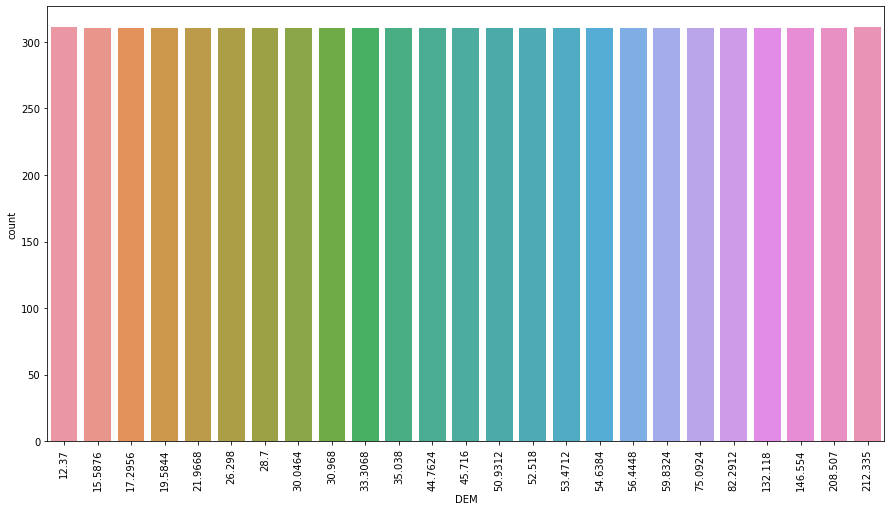

In [26]:
plt.figure(figsize=(15,8))
sns.countplot(x='DEM',data=df)
plt.xticks(rotation=90)
df['DEM'].value_counts()

All the elevations have same count equal to 310 except two who have 311 counts each.

127.135    311
126.826    311
127.024    310
127.004    310
127.086    310
127.083    310
127.022    310
127.032    310
126.938    310
127.085    310
126.910    310
126.937    310
126.927    310
126.970    310
126.991    310
126.891    310
127.058    310
126.988    310
126.909    310
126.838    310
126.995    310
127.042    310
126.955    310
127.099    310
127.040    310
Name: lon, dtype: int64

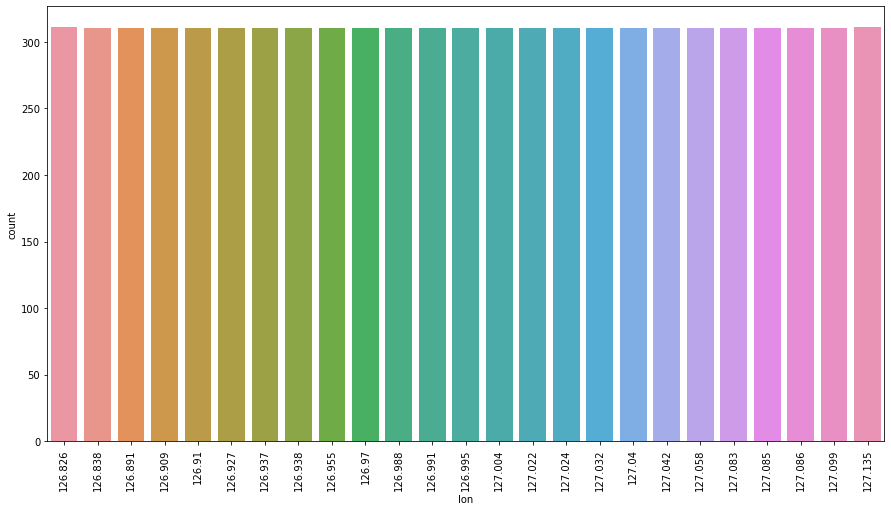

In [27]:
plt.figure(figsize=(15,8))
sns.countplot(x='lon',data=df)
plt.xticks(rotation=90)
df['lon'].value_counts()

All the longitude have smae count equal to 310 except two longitudes that have 311 counts each.

37.5507    1240
37.5776    1240
37.6046     620
37.4967     620
37.5372     620
37.4697     620
37.5102     620
37.5237     620
37.6181     620
37.6450     311
37.4562     311
37.4832     310
Name: lat, dtype: int64

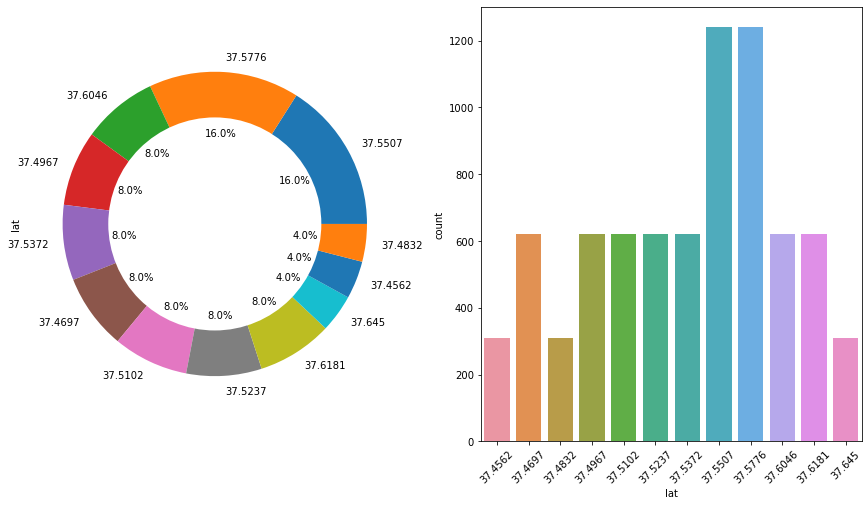

In [28]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
df['lat'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.subplot(1,2,2)
sns.countplot(x='lat',data=df)
plt.xticks(rotation=45)
df['lat'].value_counts()

There are 12 latitudes present, two of which have the highest count equal to 1240 while 7 of them have 620 counts and rest 3 have less than 350 counts.

9.0     310
15.0    310
7.0     310
23.0    310
8.0     310
3.0     310
10.0    310
16.0    310
11.0    310
2.0     310
13.0    310
12.0    310
21.0    310
14.0    310
4.0     310
25.0    310
22.0    310
17.0    310
19.0    310
20.0    310
1.0     310
5.0     310
18.0    310
6.0     310
24.0    310
0.0       2
Name: station, dtype: int64

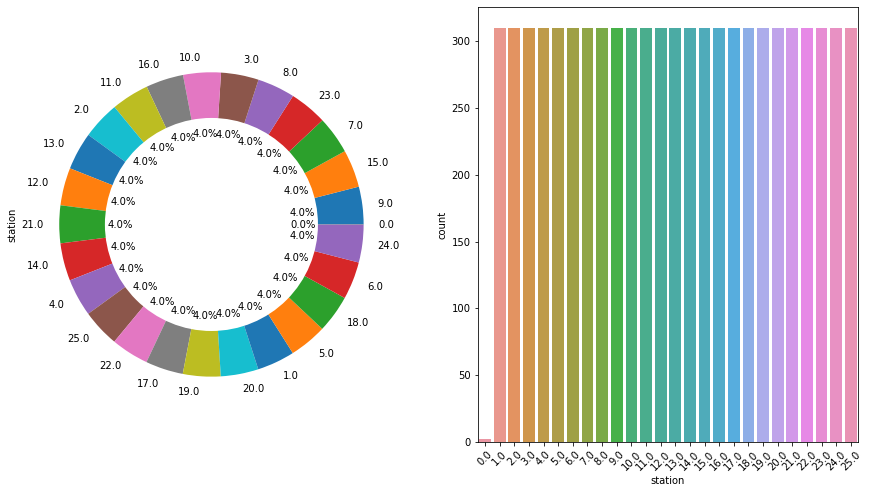

In [29]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
df['station'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.subplot(1,2,2)
sns.countplot(x='station',data=df)
plt.xticks(rotation=45)
df['station'].value_counts()

There are 25 stations each of them have 310 observations.

Minimum Tmax is 20.0 and Maximum Tmax is 37.6
Minimum Tmin is 11.3 and Maximum Tmin is 29.9


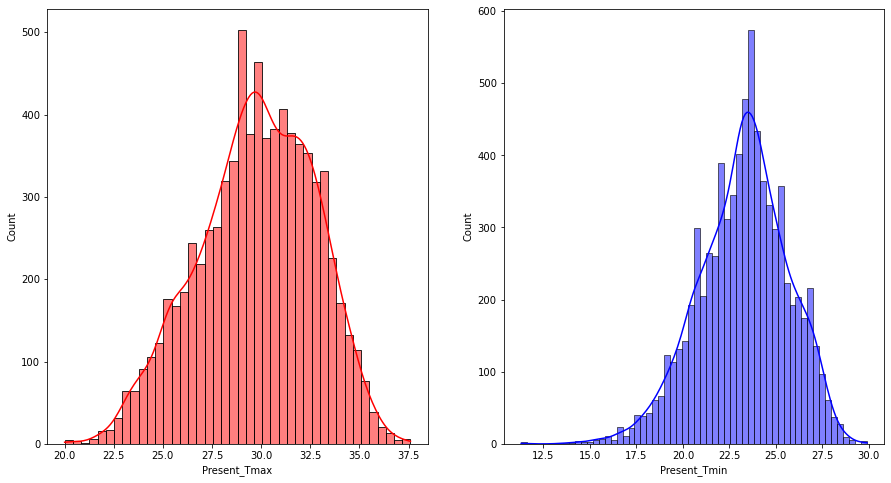

In [30]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.histplot(df['Present_Tmax'],kde=True,color='r')
plt.subplot(1,2,2)
sns.histplot(df['Present_Tmin'],kde=True,color='b')
print('Minimum Tmax is {} and Maximum Tmax is {}'.format(df['Present_Tmax'].min(),df['Present_Tmax'].max()))
print('Minimum Tmin is {} and Maximum Tmin is {}'.format(df['Present_Tmin'].min(),df['Present_Tmin'].max()))

Present Tmax and Tmin are almost normally distibuted, Tmax have highest temp as 37.6 and min as 20, most of the days have tmax equal to 28.5, while Tmin have highest temp as 29.9 and min as 11.3, most of the days have tmin equal to 23.

Minimum RHmax is 58.93628311 and Maximum RHmax is 100.0001526
Minimum RHmin is 19.79466629 and Maximum RHmin is 98.5247345


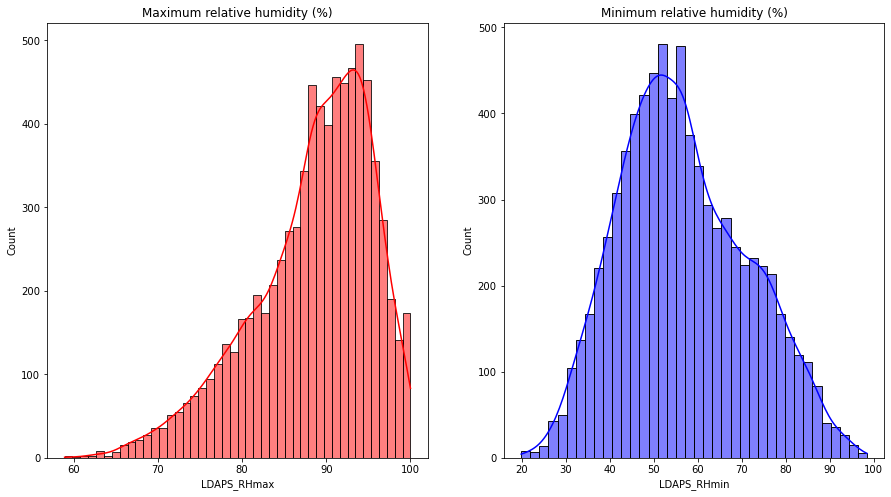

In [31]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.histplot(df['LDAPS_RHmax'],kde=True,color='r')
plt.title('Maximum relative humidity (%)')
plt.subplot(1,2,2)
sns.histplot(df['LDAPS_RHmin'],kde=True,color='b')
plt.title('Minimum relative humidity (%)')
print('Minimum RHmax is {} and Maximum RHmax is {}'.format(df['LDAPS_RHmax'].min(),df['LDAPS_RHmax'].max()))
print('Minimum RHmin is {} and Maximum RHmin is {}'.format(df['LDAPS_RHmin'].min(),df['LDAPS_RHmin'].max()))

Data of Maximum relative humidity is left skewed and Data of Maximum relative humidity is slightly right skewed. RHmax for most of the days lie in the range 92 to 97 while RHmin lies in the range 45 to 62.

Minimum Tmax applied lapse rate is 17.62495378 and Maximum Tmax applied lapse rate is 38.54225522
Minimum Tmin is applied lapse rate 14.27264631 and Maximum Tmin applied lapse rate is 29.61934244


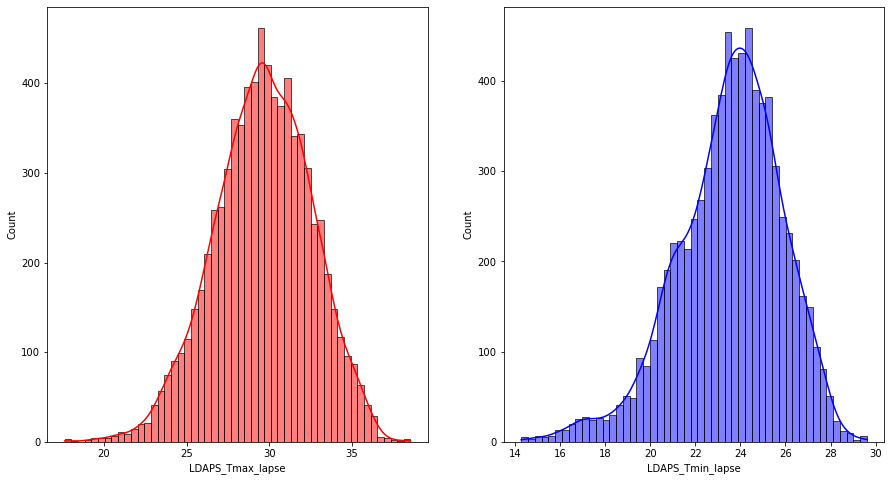

In [32]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.histplot(df['LDAPS_Tmax_lapse'],kde=True,color='r')
plt.subplot(1,2,2)
sns.histplot(df['LDAPS_Tmin_lapse'],kde=True,color='b')
print('Minimum Tmax applied lapse rate is {} and Maximum Tmax applied lapse rate is {}'.format(df['LDAPS_Tmax_lapse'].min(),df['LDAPS_Tmax_lapse'].max()))
print('Minimum Tmin is applied lapse rate {} and Maximum Tmin applied lapse rate is {}'.format(df['LDAPS_Tmin_lapse'].min(),df['LDAPS_Tmin_lapse'].max()))

Tmax and Tmin for applied lapse rate are almost normally distributed, with Tmax_lapse having maximum at 38.54 , minimum at 17.62 and for majority of days its values lies in the range 27 to 32 while Tmin_lapse having maximum at 29.61 , minimum at 14.27 and for majority of days its values lies in the range 23 to 26

Minimum 2.882579625
Maximum 21.85762099


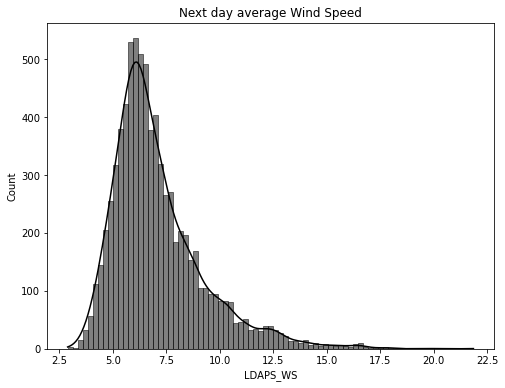

In [33]:
plt.figure(figsize=(8,6))
sns.histplot(df['LDAPS_WS'],kde=True,color='k')
plt.title('Next day average Wind Speed')
print('Minimum',df['LDAPS_WS'].min())
print('Maximum',df['LDAPS_WS'].max())

Data of average wind speed ris right skewed. It have its minimum value at 2.88m/s and maximum values at 21.85m/s and majority of its values lies in the rabge 5m/s to 8m/s

Minimum -13.60321209
Maximum 213.4140062


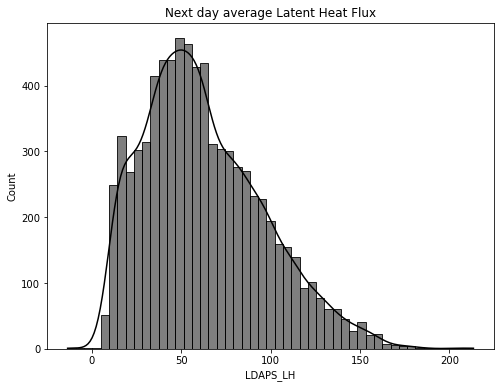

In [34]:
plt.figure(figsize=(8,6))
sns.histplot(df['LDAPS_LH'],kde=True,color='k')
plt.title('Next day average Latent Heat Flux')
print('Minimum',df['LDAPS_LH'].min())
print('Maximum',df['LDAPS_LH'].max())

Latent heat flux seems to be normally distributed with slight skewness to the right. It has its minimum value at -13.60 and maximum values at 213.41 and majority of its values lies in the range 30 to 70.

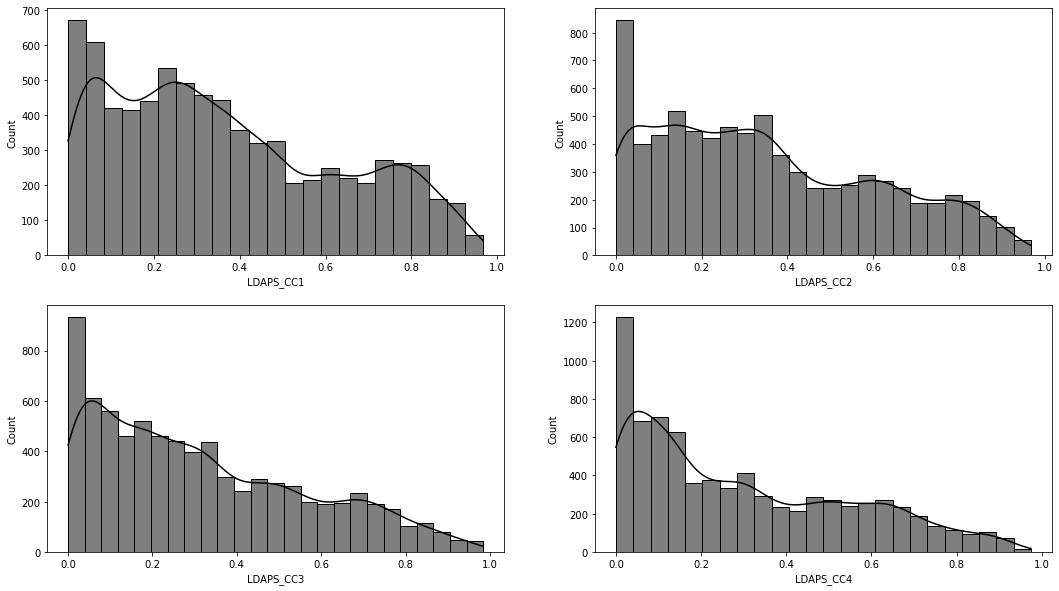

In [35]:
cloud_cover=['LDAPS_CC1','LDAPS_CC2','LDAPS_CC3','LDAPS_CC4']
fig,ax=plt.subplots(2,2,figsize=(18,10))
r=0
c=0
for i, n in enumerate(cloud_cover):
    if i%2==0 and i>0:
        r+=1
        c=0
    sns.histplot(df[n],kde=True,color='k',ax=ax[r,c])
    c+=1

Cloud cover data for all the 6 hour split is right skewed and majority of all the splits values lie close to 0.

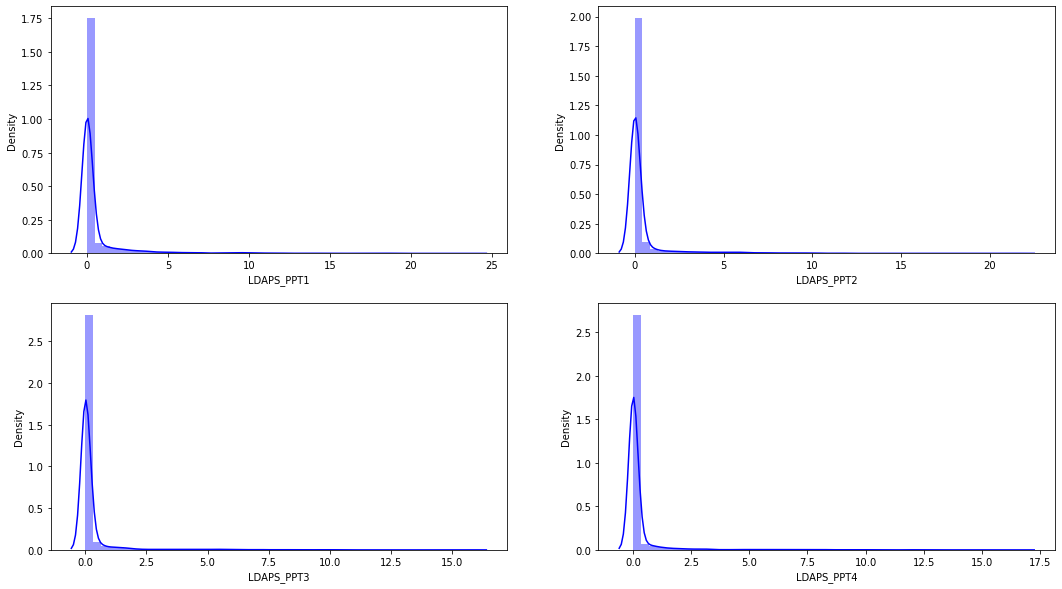

In [36]:
precipitation=['LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4']
fig,ax=plt.subplots(2,2,figsize=(18,10))
r=0
c=0
for i, n in enumerate(precipitation):
    if i%2==0 and i>0:
        r+=1
        c=0
    sns.distplot(df[n],color='b',ax=ax[r,c])
    c+=1

Precipitation data for all the 6 hour split is right skewed and majority of all the splits values lie close to 0.

Minimum 4329.520508
Maximum 5992.895996


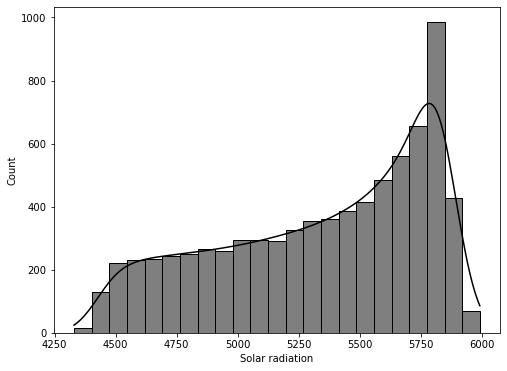

In [37]:
plt.figure(figsize=(8,6))
sns.histplot(df['Solar radiation'],kde=True,color='k')
print('Minimum',df['Solar radiation'].min())
print('Maximum',df['Solar radiation'].max())

Incoming Solar Radiation left skewed. It has its minimum value at 4329.52 and maximum values at 5992.89 and majority of its values lies in the range 5600 to 5850.

### Bivariate Analysis

<AxesSubplot:xlabel='station', ylabel='Next_Tmin'>

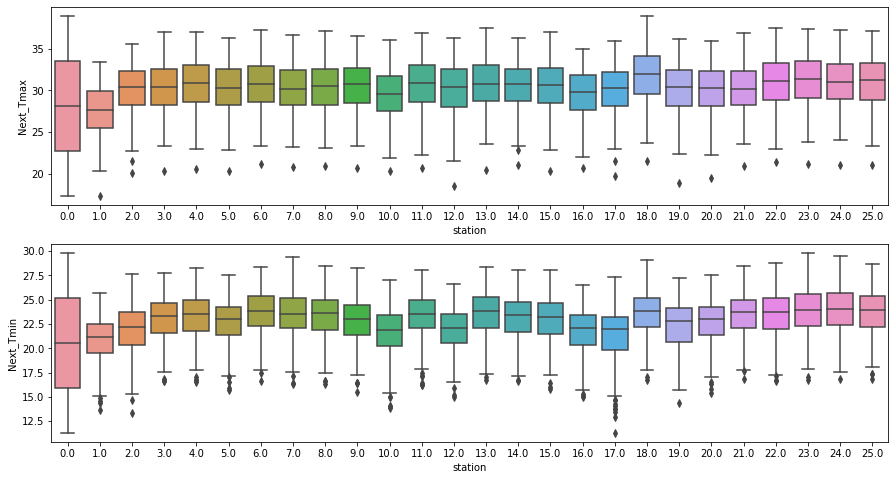

In [39]:
plt.figure(figsize=(15,8))
plt.subplot(2,1,1)
sns.boxplot(x='station',y='Next_Tmax',data=df)
plt.subplot(2,1,2)
sns.boxplot(x='station',y='Next_Tmin',data=df)

Station 18 observes highest temperature for both Tmax and Tmin while station 1 observes lowest temperatures for both. It coud be because of their location

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '37.4562'),
  Text(1, 0, '37.4697'),
  Text(2, 0, '37.4832'),
  Text(3, 0, '37.4967'),
  Text(4, 0, '37.5102'),
  Text(5, 0, '37.5237'),
  Text(6, 0, '37.5372'),
  Text(7, 0, '37.5507'),
  Text(8, 0, '37.5776'),
  Text(9, 0, '37.6046'),
  Text(10, 0, '37.6181'),
  Text(11, 0, '37.645')])

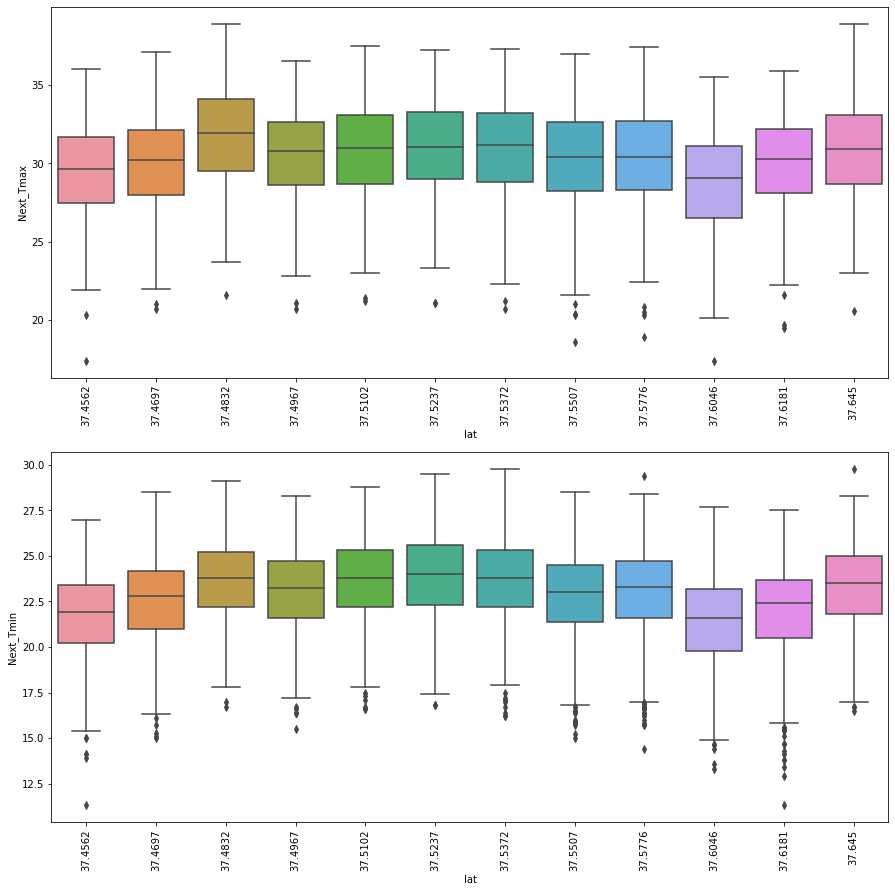

In [40]:
plt.figure(figsize=(15,15))
plt.subplot(2,1,1)
sns.boxplot(x='lat',y='Next_Tmax',data=df)
plt.xticks(rotation=90)

plt.subplot(2,1,2)
sns.boxplot(x='lat',y='Next_Tmin',data=df)
plt.xticks(rotation=90)

Temperature seems to fall as the the latitude increases which is also a know fact. Highest temperature is observed at 37.645 for Tmax while this is not the case for tmin which could be because of the other factors that affect the temperature.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, '126.826'),
  Text(1, 0, '126.838'),
  Text(2, 0, '126.891'),
  Text(3, 0, '126.909'),
  Text(4, 0, '126.91'),
  Text(5, 0, '126.927'),
  Text(6, 0, '126.937'),
  Text(7, 0, '126.938'),
  Text(8, 0, '126.955'),
  Text(9, 0, '126.97'),
  Text(10, 0, '126.988'),
  Text(11, 0, '126.991'),
  Text(12, 0, '126.995'),
  Text(13, 0, '127.004'),
  Text(14, 0, '127.022'),
  Text(15, 0, '127.024'),
  Text(16, 0, '127.032'),
  Text(17, 0, '127.04'),
  Text(18, 0, '127.042'),
  Text(19, 0, '127.058'),
  Text(20, 0, '127.083'),
  Text(21, 0, '127.085'),
  Text(22, 0, '127.086'),
  Text(23, 0, '127.099'),
  Text(24, 0, '127.135')])

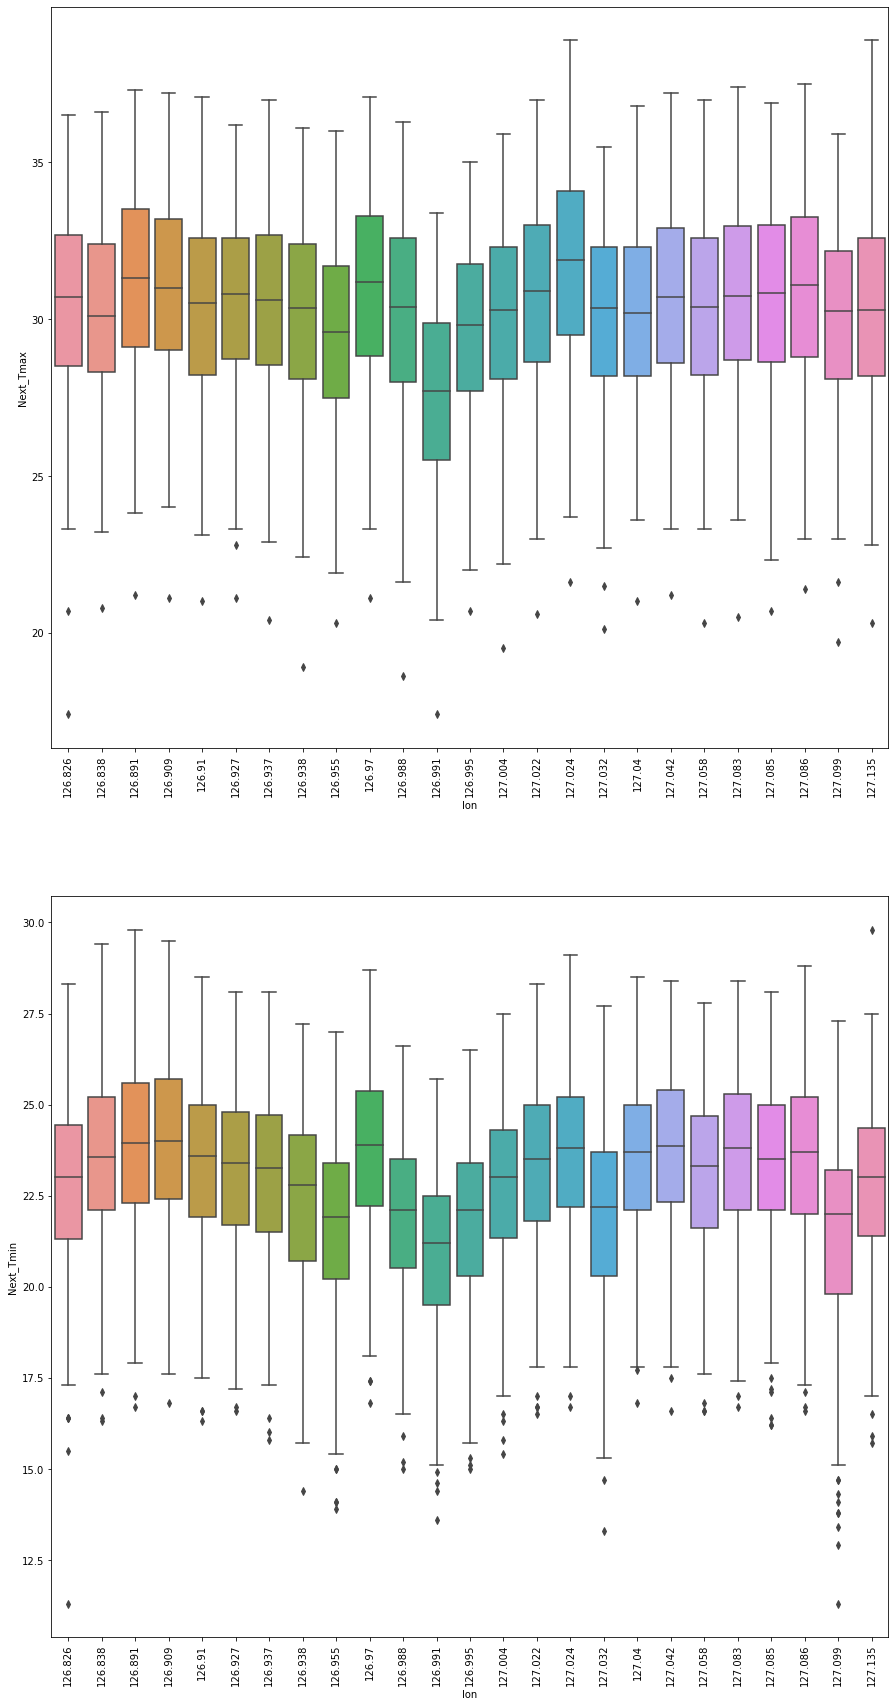

In [41]:
plt.figure(figsize=(15,30))
plt.subplot(2,1,1)
sns.boxplot(x='lon',y='Next_Tmax',data=df)
plt.xticks(rotation=90)

plt.subplot(2,1,2)
sns.boxplot(x='lon',y='Next_Tmin',data=df)
plt.xticks(rotation=90)

Studies have shown that longitude does not affect the temperature of a place. While from the above graph it is seen that as the longitude increases, temperature increases for the first 4 longitudes then decreases for the next 5. This increase decrease is carried on.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, '12.37'),
  Text(1, 0, '15.5876'),
  Text(2, 0, '17.2956'),
  Text(3, 0, '19.5844'),
  Text(4, 0, '21.9668'),
  Text(5, 0, '26.298'),
  Text(6, 0, '28.7'),
  Text(7, 0, '30.0464'),
  Text(8, 0, '30.968'),
  Text(9, 0, '33.3068'),
  Text(10, 0, '35.038'),
  Text(11, 0, '44.7624'),
  Text(12, 0, '45.716'),
  Text(13, 0, '50.9312'),
  Text(14, 0, '52.518'),
  Text(15, 0, '53.4712'),
  Text(16, 0, '54.6384'),
  Text(17, 0, '56.4448'),
  Text(18, 0, '59.8324'),
  Text(19, 0, '75.0924'),
  Text(20, 0, '82.2912'),
  Text(21, 0, '132.118'),
  Text(22, 0, '146.554'),
  Text(23, 0, '208.507'),
  Text(24, 0, '212.335')])

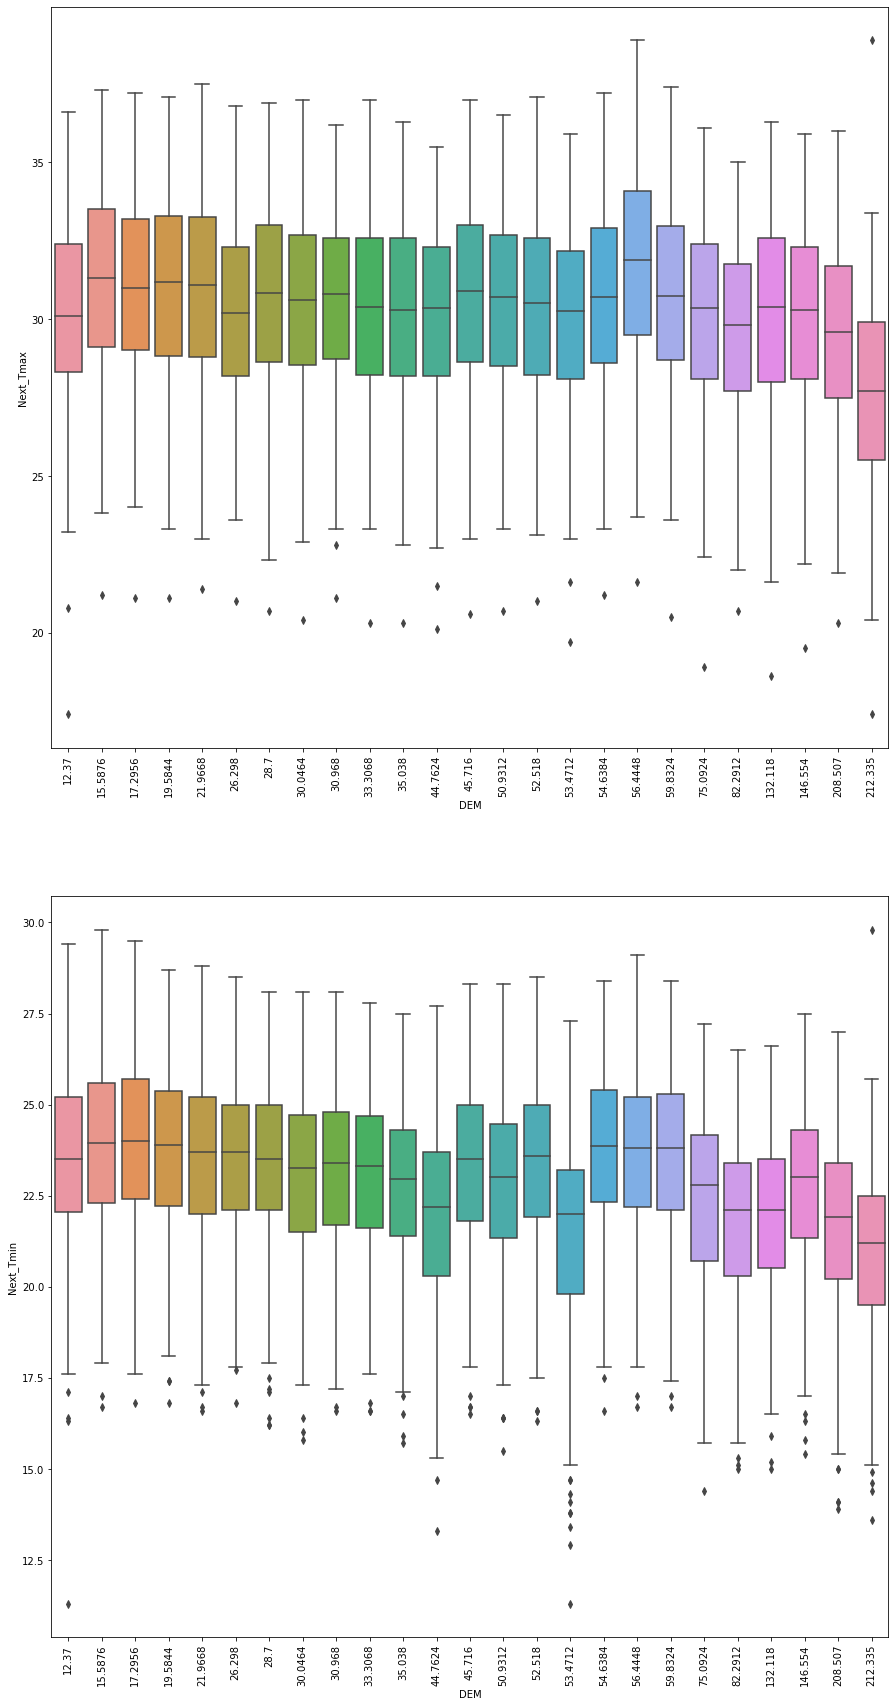

In [42]:
plt.figure(figsize=(15,30))
plt.subplot(2,1,1)
sns.boxplot(x='DEM',y='Next_Tmax',data=df)
plt.xticks(rotation=90)

plt.subplot(2,1,2)
sns.boxplot(x='DEM',y='Next_Tmin',data=df)
plt.xticks(rotation=90)

Studies show that as the elevation increases, temperature decreases. This even true for our graph for the last 10 high elevations but not for all. It seems that temperature is also affected by other features rather than just elevation.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 [Text(0, 0, '0.0984746'),
  Text(1, 0, '0.0985'),
  Text(2, 0, '0.1332'),
  Text(3, 0, '0.1457'),
  Text(4, 0, '0.1554'),
  Text(5, 0, '0.2223'),
  Text(6, 0, '0.2661'),
  Text(7, 0, '0.2713'),
  Text(8, 0, '0.4125'),
  Text(9, 0, '0.5055'),
  Text(10, 0, '0.5141'),
  Text(11, 0, '0.5721'),
  Text(12, 0, '0.5931'),
  Text(13, 0, '0.618'),
  Text(14, 0, '0.6233'),
  Text(15, 0, '0.697'),
  Text(16, 0, '0.8552'),
  Text(17, 0, '1.2313'),
  Text(18, 0, '1.5629'),
  Text(19, 0, '1.7678'),
  Text(20, 0, '2.2579'),
  Text(21, 0, '2.5348'),
  Text(22, 0, '2.6865'),
  Text(23, 0, '2.785'),
  Text(24, 0, '4.7296'),
  Text(25, 0, '5.1782'),
  Text(26, 0, '5.17823')])

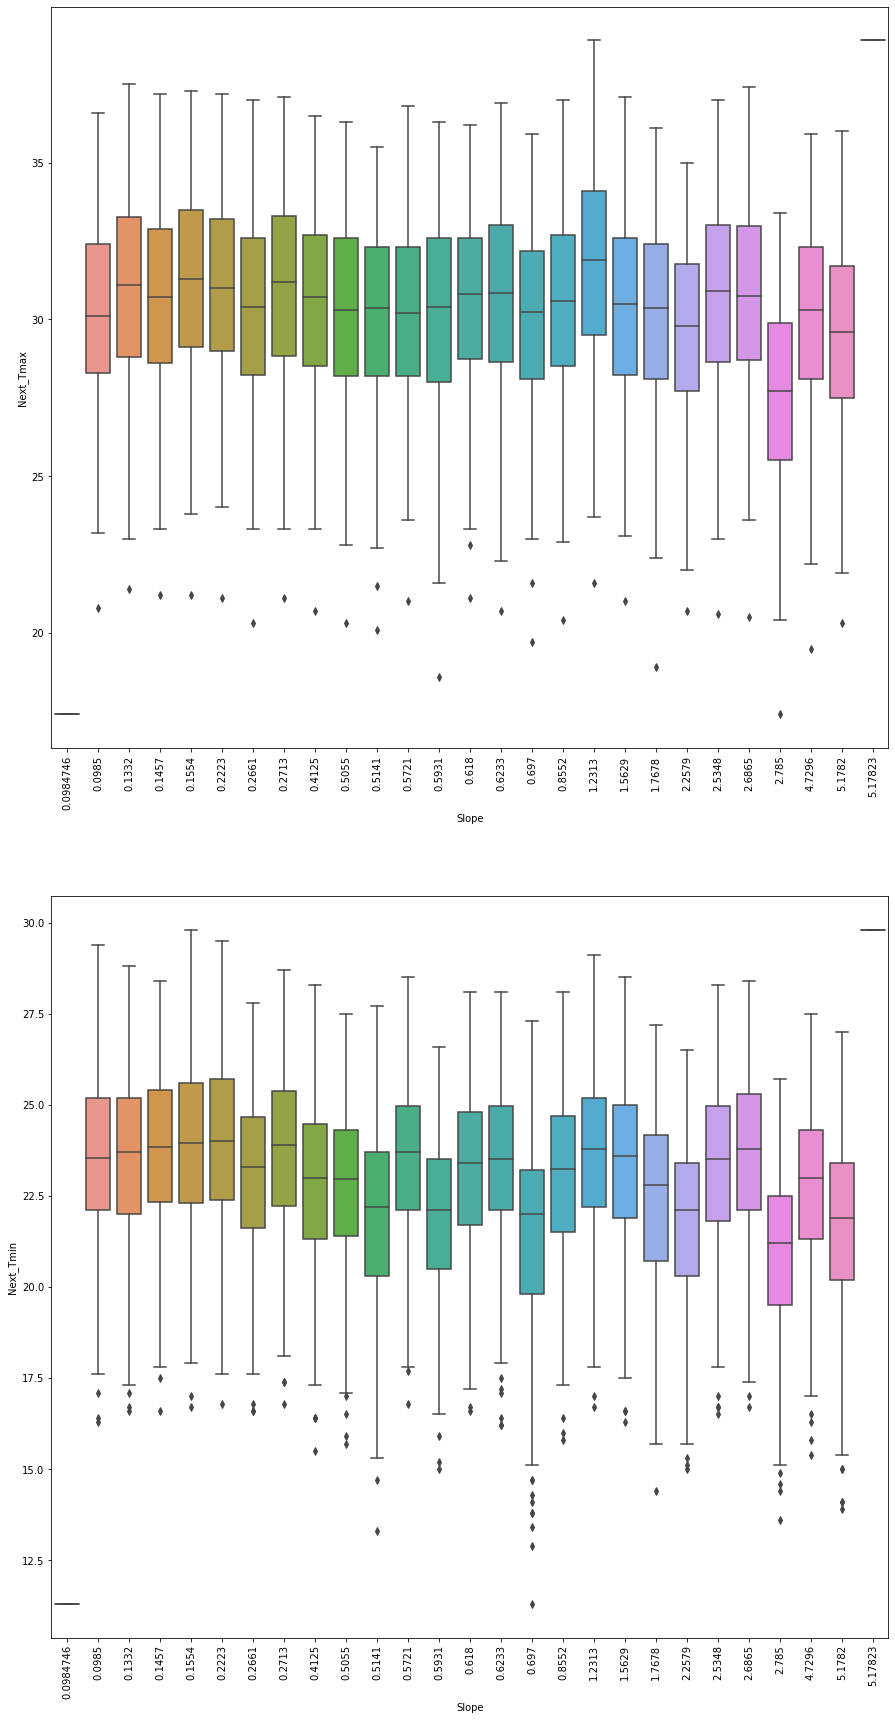

In [43]:
plt.figure(figsize=(15,30))
plt.subplot(2,1,1)
sns.boxplot(x='Slope',y='Next_Tmax',data=df)
plt.xticks(rotation=90)
plt.subplot(2,1,2)
sns.boxplot(x='Slope',y='Next_Tmin',data=df)
plt.xticks(rotation=90)

A steep slope experiences a more rapid change in temperature than a gentle one thats why as rhe slopes increases the range of temperature also increases. Lowest and Highest temperatures are observed at consecutive slopes 0.697 and 0.8552 respectively

<AxesSubplot:title={'center':'Next day min Temperature Vs Present day min Temperature'}, xlabel='Present_Tmin', ylabel='Next_Tmin'>

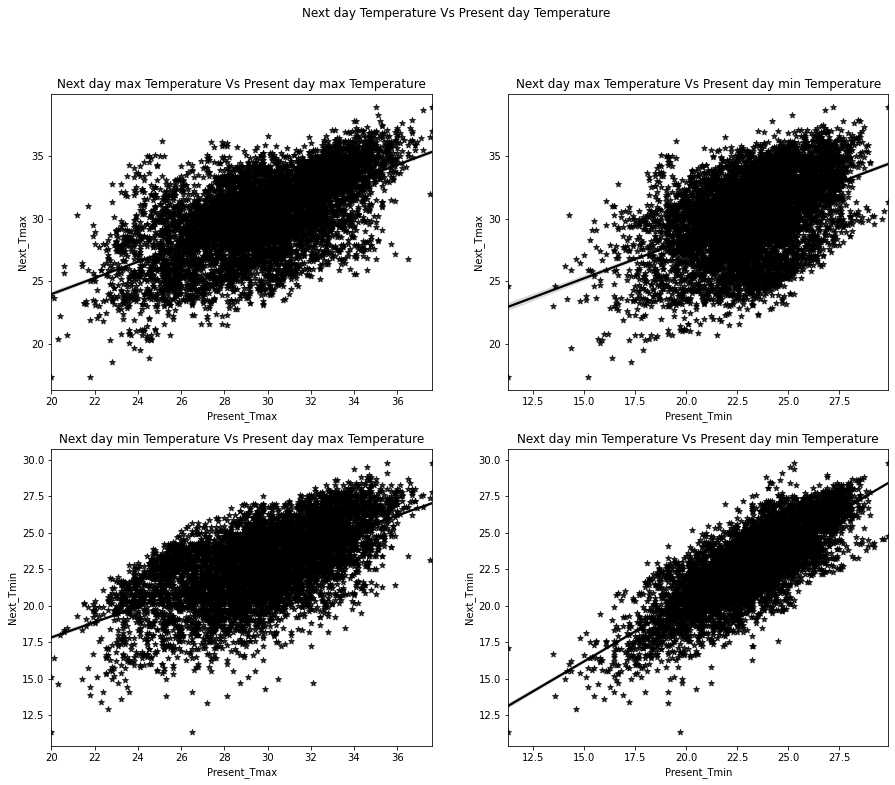

In [44]:
plt.figure(figsize=(15,12))
plt.suptitle('Next day Temperature Vs Present day Temperature')

plt.subplot(2,2,1)
plt.title('Next day max Temperature Vs Present day max Temperature')
sns.regplot(x='Present_Tmax',y='Next_Tmax',data=df,marker='*',color='k')

plt.subplot(2,2,2)
plt.title('Next day max Temperature Vs Present day min Temperature')
sns.regplot(x='Present_Tmin',y='Next_Tmax',data=df,marker='*',color='k')

plt.subplot(2,2,3)
plt.title('Next day min Temperature Vs Present day max Temperature')
sns.regplot(x='Present_Tmax',y='Next_Tmin',data=df,marker='*',color='k')

plt.subplot(2,2,4)
plt.title('Next day min Temperature Vs Present day min Temperature')
sns.regplot(x='Present_Tmin',y='Next_Tmin',data=df,marker='*',color='k')

There is high positive correlation of Next day temperatures with the present day temperatures.

<AxesSubplot:xlabel='LDAPS_LH', ylabel='Next_Tmin'>

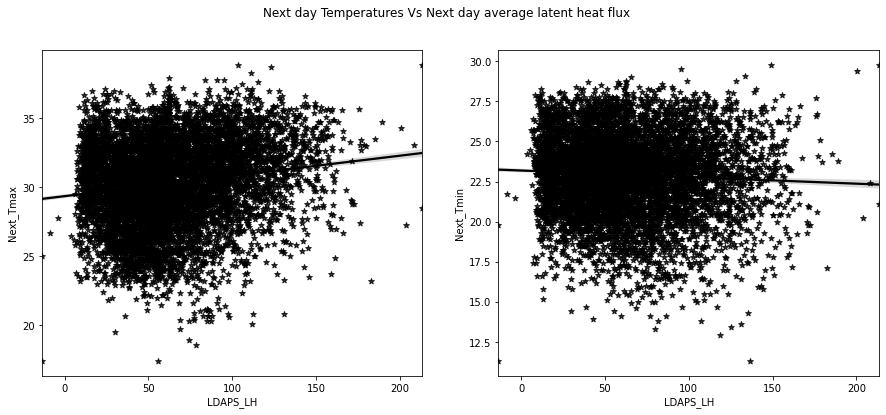

In [45]:
plt.figure(figsize=(15,6))
plt.suptitle('Next day Temperatures Vs Next day average latent heat flux')

plt.subplot(1,2,1)
sns.regplot(x='LDAPS_LH',y='Next_Tmax',data=df,marker='*',color='k')

plt.subplot(1,2,2)
sns.regplot(x='LDAPS_LH',y='Next_Tmin',data=df,marker='*',color='k')

As Latent heat flux increases Tmax also increases while Tmin decreases. Latent heat flux seem to bring out extremes of temperature with its increase.

<AxesSubplot:xlabel='LDAPS_PPT4', ylabel='Next_Tmax'>

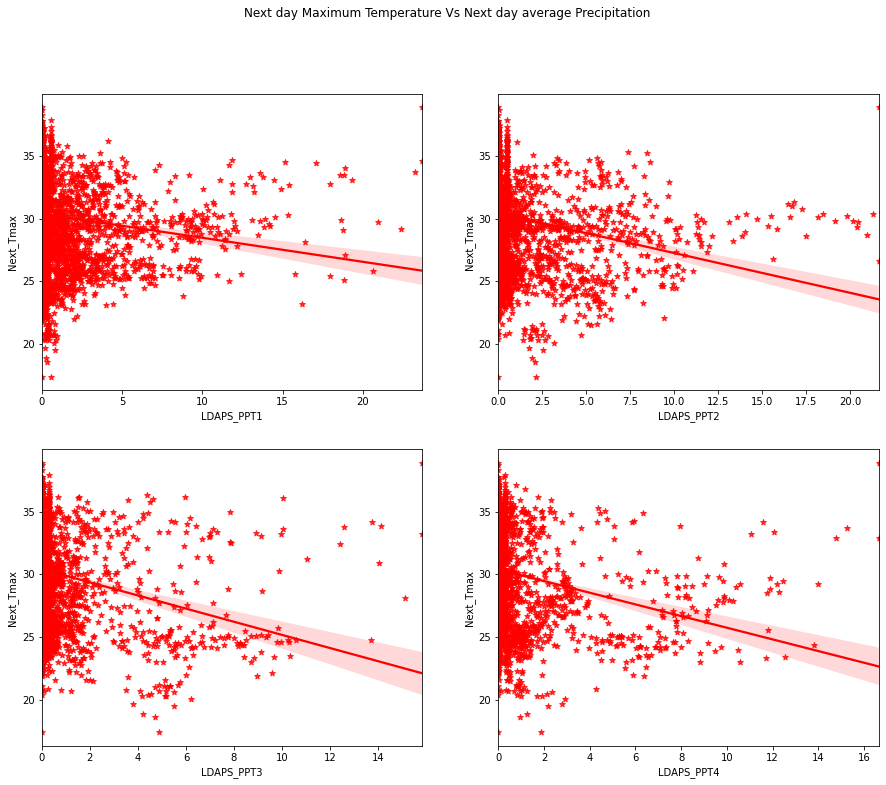

In [46]:
plt.figure(figsize=(15,12))
plt.suptitle('Next day Maximum Temperature Vs Next day average Precipitation')

plt.subplot(2,2,1)
sns.regplot(x='LDAPS_PPT1',y='Next_Tmax',data=df,marker='*',color='r')

plt.subplot(2,2,2)
sns.regplot(x='LDAPS_PPT2',y='Next_Tmax',data=df,marker='*',color='r')

plt.subplot(2,2,3)
sns.regplot(x='LDAPS_PPT3',y='Next_Tmax',data=df,marker='*',color='r')

plt.subplot(2,2,4)
sns.regplot(x='LDAPS_PPT4',y='Next_Tmax',data=df,marker='*',color='r')

Tmax decreases as the precipitation increases irrespective of any split which is also what studies show.

<AxesSubplot:xlabel='station', ylabel='Next_Tmin'>

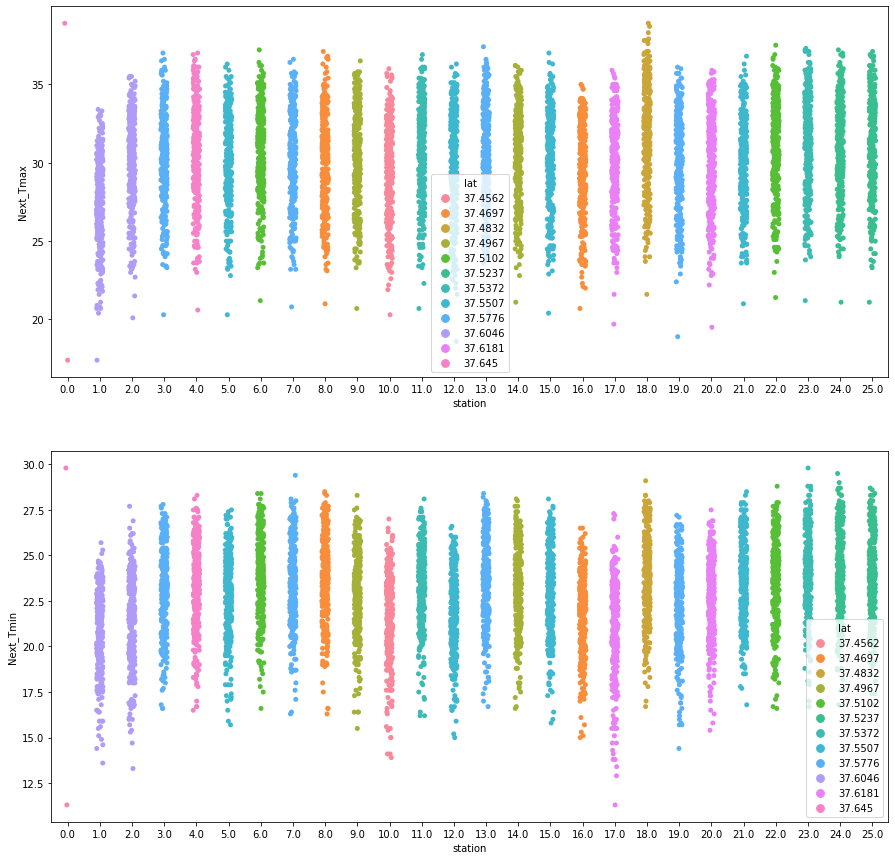

In [47]:
plt.figure(figsize=(15,15))
plt.subplot(2,1,1)
sns.stripplot(x='station',y='Next_Tmax',hue='lat',data=df)

plt.subplot(2,1,2)
sns.stripplot(x='station',y='Next_Tmin',hue='lat',data=df)

Each station is located on a particular lalitude, There are atmost 3 staions on a single latitude, and as the latitude decreases, temperature seem to increase.

<AxesSubplot:xlabel='LDAPS_PPT4', ylabel='LDAPS_CC4'>

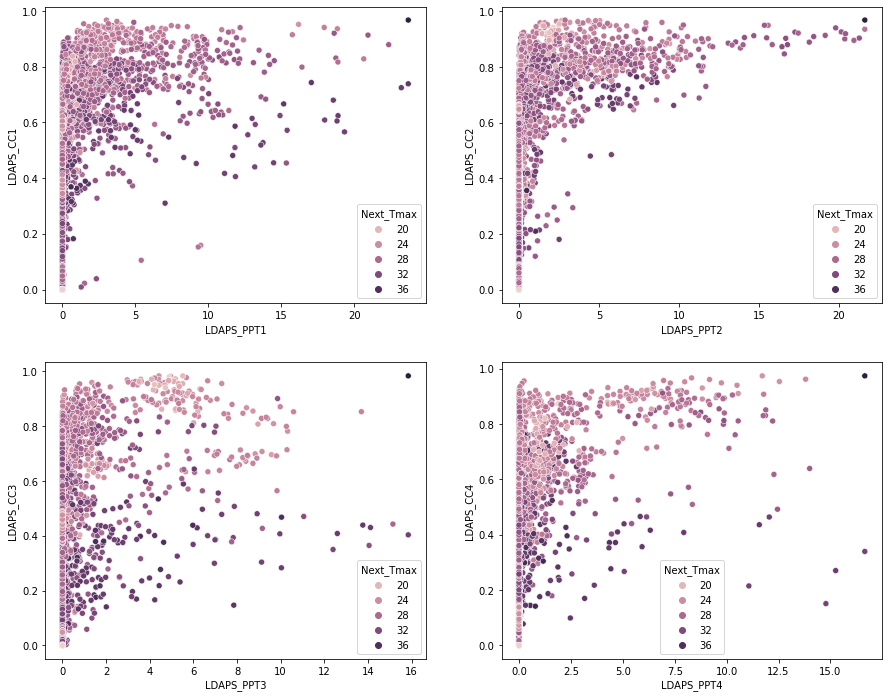

In [48]:
plt.figure(figsize=(15,12))

plt.subplot(2,2,1)
sns.scatterplot(x='LDAPS_PPT1',y='LDAPS_CC1',hue='Next_Tmax',data=df)

plt.subplot(2,2,2)
sns.scatterplot(x='LDAPS_PPT2',y='LDAPS_CC2',hue='Next_Tmax',data=df)

plt.subplot(2,2,3)
sns.scatterplot(x='LDAPS_PPT3',y='LDAPS_CC3',hue='Next_Tmax',data=df)

plt.subplot(2,2,4)
sns.scatterplot(x='LDAPS_PPT4',y='LDAPS_CC4',hue='Next_Tmax',data=df)

In the 1st split of cloud cover and precipitaion, precipitation increases after a value of cloud cover crosses 0.3 wjile this threshold increases to 0.5 in 2nd split after that decreases for all the splits. Tmax is higher when there cloud cover and precipitation both have lower value, while presence of outliers are also there.

<AxesSubplot:xlabel='LDAPS_RHmin', ylabel='LDAPS_Tmin_lapse'>

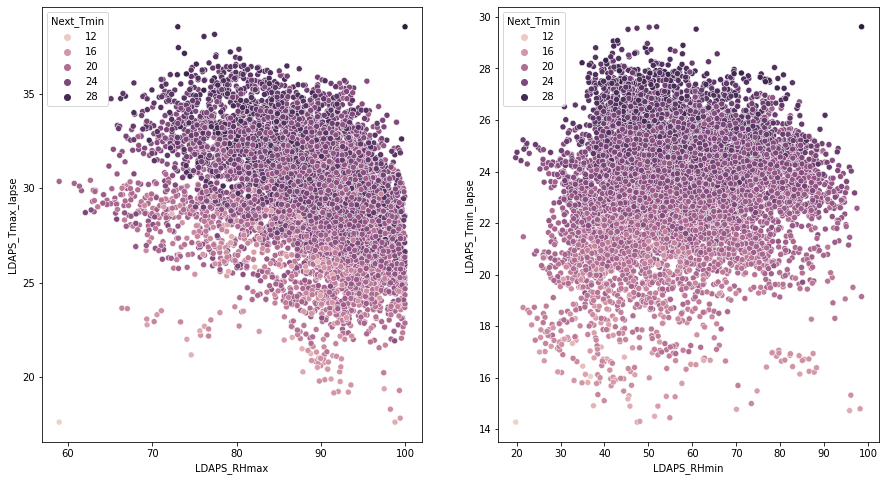

In [49]:
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
sns.scatterplot(x='LDAPS_RHmax',y='LDAPS_Tmax_lapse',hue='Next_Tmin',data=df)

plt.subplot(1,2,2)
sns.scatterplot(x='LDAPS_RHmin',y='LDAPS_Tmin_lapse',hue='Next_Tmin',data=df)

As RHmax increases, Tmax lapse rate decreases and Next day Tmin also seem to decrease while as Rhmin increases Tmin lapse rate also seem to increase but Next dat Tmin decreases

## Plotting outliers

station                AxesSubplot(0.125,0.787927;0.168478x0.0920732)
Present_Tmax        AxesSubplot(0.327174,0.787927;0.168478x0.0920732)
Present_Tmin        AxesSubplot(0.529348,0.787927;0.168478x0.0920732)
LDAPS_RHmin         AxesSubplot(0.731522,0.787927;0.168478x0.0920732)
LDAPS_RHmax            AxesSubplot(0.125,0.677439;0.168478x0.0920732)
LDAPS_Tmax_lapse    AxesSubplot(0.327174,0.677439;0.168478x0.0920732)
LDAPS_Tmin_lapse    AxesSubplot(0.529348,0.677439;0.168478x0.0920732)
LDAPS_WS            AxesSubplot(0.731522,0.677439;0.168478x0.0920732)
LDAPS_LH               AxesSubplot(0.125,0.566951;0.168478x0.0920732)
LDAPS_CC1           AxesSubplot(0.327174,0.566951;0.168478x0.0920732)
LDAPS_CC2           AxesSubplot(0.529348,0.566951;0.168478x0.0920732)
LDAPS_CC3           AxesSubplot(0.731522,0.566951;0.168478x0.0920732)
LDAPS_CC4              AxesSubplot(0.125,0.456463;0.168478x0.0920732)
LDAPS_PPT1          AxesSubplot(0.327174,0.456463;0.168478x0.0920732)
LDAPS_PPT2          

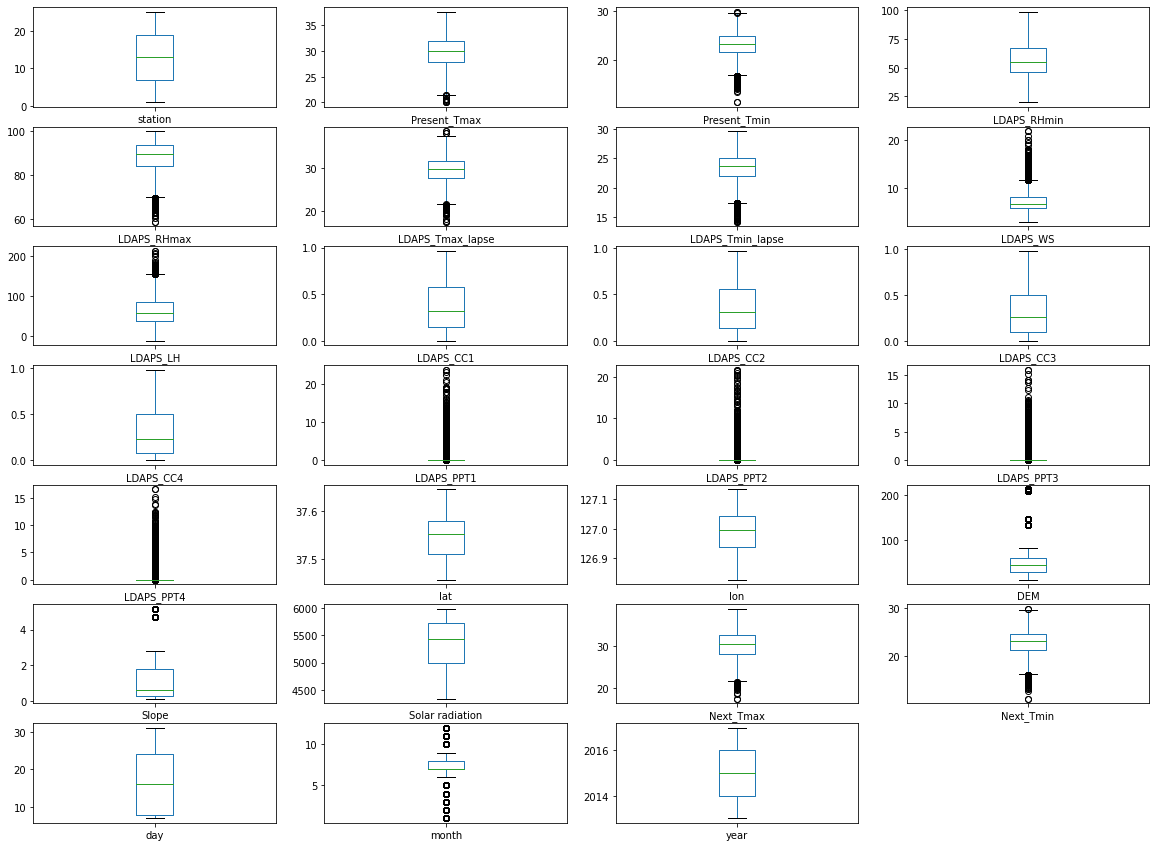

In [99]:
df.plot(kind = 'box',subplots = True,layout=(7,4),figsize = (20,15))

here tried to show is there any outliers present across the columns and we could see there is outliers present so we try to minimise the outliers

### Applying IQR method

In [12]:
df.columns

Index(['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin', 'day', 'month', 'year'],
      dtype='object')

In [7]:
dfcontcol = df.drop(columns = ['day','year','Solar radiation','Slope','lat','LDAPS_CC4','LDAPS_CC3','LDAPS_CC2',
                              'LDAPS_CC1','LDAPS_RHmin','station'])

In [8]:
# finding out the quantile of data with continuous columns
Q1 = dfcontcol.quantile(0.25)
Q3 = dfcontcol.quantile(0.75)
IQR = Q3 - Q1

# removing outliers using IQR method
df_new = df[~((dfcontcol < (Q1 - 1.5 * IQR)) |(dfcontcol > (Q3 + 1.5 * IQR))).any(axis=1)]

here i applied IQR methos to minimise the outliers

In [9]:
print(df_new.shape)
print(df.shape)

(2440, 27)
(7752, 27)


here i can see we have minimised the outliers

<AxesSubplot:>

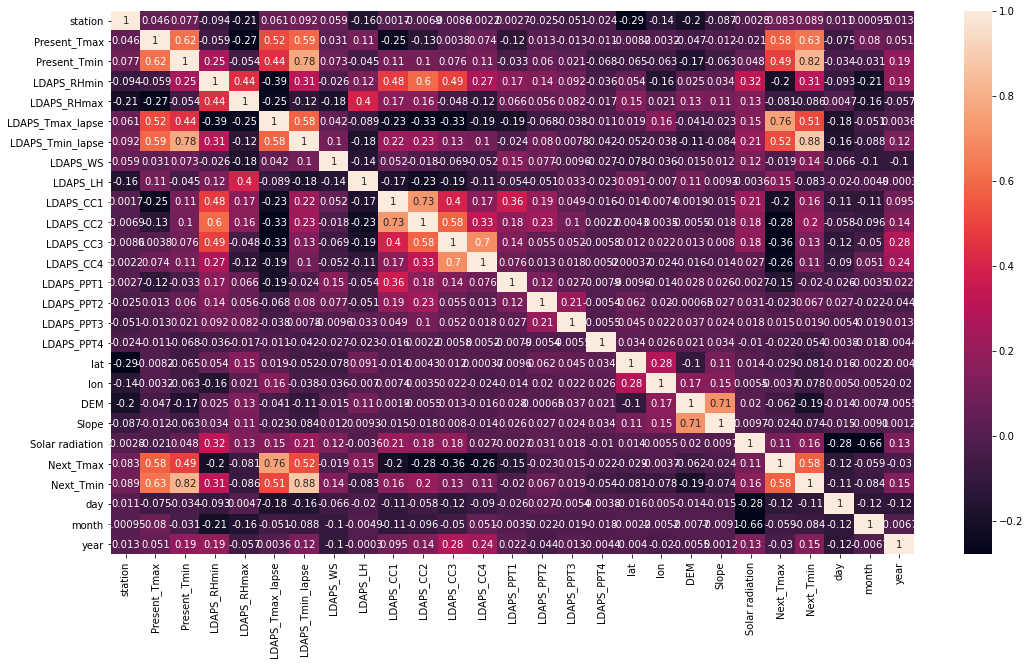

In [70]:
plt.figure(figsize=(18,10))
sns.heatmap(df_new.corr(),annot = True,robust = True)

here i ploted the heatmap to show multicolinearity across the columns

## Preprocessing

In [11]:
# removing null values from a continuous columns
col2 = ['Next_Tmin','Next_Tmax','LDAPS_PPT4','LDAPS_PPT3','LDAPS_PPT2','LDAPS_PPT1','LDAPS_CC4','LDAPS_CC3','LDAPS_CC2',
      'LDAPS_CC1','LDAPS_LH','LDAPS_WS','LDAPS_Tmin_lapse','LDAPS_Tmax_lapse','LDAPS_RHmax','LDAPS_RHmin','Present_Tmin',
      'Present_Tmax']

df_new[col2] = df_new[col2].fillna(df_new[col2].mean())

dealing with missing values

In [12]:
df_new.isnull().sum()

station             0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
day                 0
month               0
year                0
dtype: int64

here we can see all the null values has been removed

In [72]:
df_new.columns

Index(['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin', 'day', 'month', 'year'],
      dtype='object')

In [13]:
x = df_new.drop(columns = ['Next_Tmax','Next_Tmin'],axis = 1)
ymin = df_new['Next_Tmin']
ymax = df_new['Next_Tmax']

here we are splitting the data into x and y beacuse we have two target variables so we are making a ymin and ymax

In [12]:
print(x.shape)
print(ymin.shape)
print(ymax.shape)

(2440, 25)
(2440,)
(2440,)


checking out the shape of x and y

In [15]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [14]:
x_train,x_test,y_train_min,y_test_min = train_test_split(x,ymin,test_size = .25,random_state = 42)

here er are splitting the data into training set and testing set

In [15]:
knr = KNeighborsRegressor()
lr = LinearRegression()
svm = SVR()
rfr = RandomForestRegressor()
model = [knr,lr,svm,rfr]
for i in model:
    i.fit(x_train,y_train_min)
    pred = i.predict(x_test)
    print('training score: ',i,'is',i.score(x_train,y_train_min))
    print('testing score: ',i,'is',i.score(x_test,y_test_min))
    
    # The mean squared error
    print("Mean squared error: ",i,'is',mean_squared_error(y_test_min,pred))
    # The coefficient of determination: 1 is perfect prediction
    print("Coefficient of determination: ",i,'is', r2_score(y_test_min,pred))
    
    print('\n')
    

training score:  KNeighborsRegressor() is 0.6317566951059126
testing score:  KNeighborsRegressor() is 0.46933126686114146
Mean squared error:  KNeighborsRegressor() is 2.6661368239266126
Coefficient of determination:  KNeighborsRegressor() is 0.46933126686114146


training score:  LinearRegression() is 0.8405139888163942
testing score:  LinearRegression() is 0.844942509858237
Mean squared error:  LinearRegression() is 0.7790255171947685
Coefficient of determination:  LinearRegression() is 0.844942509858237


training score:  SVR() is 0.059485672471341844
testing score:  SVR() is 0.02184063906298017
Mean squared error:  SVR() is 4.9143778952967025
Coefficient of determination:  SVR() is 0.02184063906298017


training score:  RandomForestRegressor() is 0.9851787315053702
testing score:  RandomForestRegressor() is 0.9080784942638189
Mean squared error:  RandomForestRegressor() is 0.46182353707635104
Coefficient of determination:  RandomForestRegressor() is 0.9080784942638189




And i used necessary machine learning models deploid the training set and testing set and checked the accuracy

In [17]:
# k-fold CV 
from sklearn.model_selection import KFold,cross_val_score
from numpy import mean
from numpy import std
for i in model:
    scores = cross_val_score(i, x, ymin, scoring='r2', cv=10) 
    print('Accuracy of',i,' %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy of KNeighborsRegressor()  -0.518 (0.659)
Accuracy of LinearRegression()  0.693 (0.105)
Accuracy of SVR()  -0.665 (0.808)
Accuracy of RandomForestRegressor()  0.692 (0.119)


i used cross_validation_score to check if there is any underfitting or overfitting . Looks like randomforest model is giving the best score

## Hyperparameter Tuning

In [18]:
from sklearn.model_selection import GridSearchCV
params={'n_estimators': [90,100,115,130,140,150,160,170],
        'min_samples_split':[1,2,3,4],
        'min_samples_leaf':[1,2,3,4],
        'max_depth':[None,1,2,3,4,5,6,7,8,9,10,15]}
rfr= RandomForestRegressor()
clf = GridSearchCV(estimator = rfr,param_grid = params)
clf.fit(x_train,y_train_min)
clf.best_params_

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 170}

In [19]:
rfr2 = RandomForestRegressor(max_depth = None,
                         min_samples_leaf = 1,
                         min_samples_split = 3,
                         n_estimators = 170)
rfr2.fit(x_train,y_train_min)
print(rfr2.score(x_train,y_train_min))
print(rfr2.score(x_test,y_test_min))

0.9841331161918219
0.90843533372914


Now Here i used the required parameter in randomforest classifier and tries to increase the accuracy and we can see it has been increased a little bit.

In [20]:
pred_final = rfr2.predict(x_test)

Text(0, 0.5, 'Predicted')

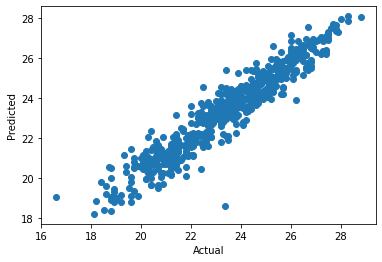

In [22]:
# checking out the differnce between actual and predicted values
plt.scatter(x = y_test_min,y = pred_final)
plt.xlabel('Actual')
plt.ylabel('Predicted')

the above graph shows the difference between the actual value and the predicted value

In [23]:
compare = pd.DataFrame({'actual value':y_test_min,
                       'predicted value':pred_final})
compare.head(20)

,actual value,predicted value
5132,24.3,24.355480
4098,25.0,24.327041
6901,23.7,23.921755
4842,22.5,21.563455
4031,25.8,25.392686
5129,22.7,21.596550
1927,23.2,22.933473
2024,25.1,24.566912
6991,22.7,22.587944
3841,23.1,24.244669


here i tryed to show difference of the two columns actual and predicted 

In [ ]:
import pickle
filename = 'Temperature_forcaste.pkl'
pickle.dump(rfr2,open(filename,'wb'))

# ymax

In [17]:
xtrain,xtest,ytrain_max,ytest_max = train_test_split(x,ymax,test_size = .25,random_state = 42)

In [18]:
knr = KNeighborsRegressor()
lr = LinearRegression()
svm = SVR()
rfr = RandomForestRegressor()
model = [knr,lr,svm,rfr]
for i in model:
    i.fit(xtrain,ytrain_max)
    pred2 = i.predict(xtest)
    print('training score: ',i,'is',i.score(xtrain,ytrain_max))
    print('testing score: ',i,'is',i.score(xtest,ytest_max))
    
    # The mean squared error
    print("Mean squared error: ",i,'is',mean_squared_error(ytest_max,pred2))
    # The coefficient of determination: 1 is perfect prediction
    print("Coefficient of determination: ",i,'is', r2_score(ytest_max,pred2))
    
    print('\n')

training score:  KNeighborsRegressor() is 0.6022939993623713
testing score:  KNeighborsRegressor() is 0.42519529123167443
Mean squared error:  KNeighborsRegressor() is 2.876589743185216
Coefficient of determination:  KNeighborsRegressor() is 0.42519529123167443


training score:  LinearRegression() is 0.6998001212216511
testing score:  LinearRegression() is 0.6599524991864735
Mean squared error:  LinearRegression() is 1.7017556365047282
Coefficient of determination:  LinearRegression() is 0.6599524991864735


training score:  SVR() is 0.01936059061377393
testing score:  SVR() is 0.008218767228954538
Mean squared error:  SVR() is 4.9633339430812775
Coefficient of determination:  SVR() is 0.008218767228954538


training score:  RandomForestRegressor() is 0.9788803410409258
testing score:  RandomForestRegressor() is 0.846128701907315
Mean squared error:  RandomForestRegressor() is 0.7700434445160604
Coefficient of determination:  RandomForestRegressor() is 0.846128701907315




And i used necessary machine learning models deploid the training set and testing set and checked the accuracy

In [19]:
# k-fold CV 
from sklearn.model_selection import KFold,cross_val_score
from numpy import mean
from numpy import std
for i in model:
    scores = cross_val_score(i, x, ymax, scoring='r2', cv=10) 
    print('Accuracy of',i,' %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy of KNeighborsRegressor()  -0.307 (0.355)
Accuracy of LinearRegression()  0.518 (0.154)
Accuracy of SVR()  -0.292 (0.271)
Accuracy of RandomForestRegressor()  0.475 (0.176)


i used cross_validation_score to check if there is any underfitting or overfitting . Looks like randomforest model is giving the best score

In [21]:
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
              'max_features': ['auto', 'sqrt'],
              'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10]}
rfr= RandomForestRegressor()
clf = GridSearchCV(estimator = rfr,param_grid = parameters)
clf.fit(xtrain,ytrain_max)
clf.best_params_

{'max_depth': 100,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [23]:
rfr3 = RandomForestRegressor(max_depth = 100,
                         min_samples_leaf = 1,
                         min_samples_split = 2,
                         max_features = 'sqrt')
rfr3.fit(xtrain,ytrain_max)
print(rfr3.score(xtrain,ytrain_max))
print(rfr3.score(xtest,ytest_max))

0.9811008824584446
0.8617910040700782


Now Here i used the required parameter in randomforest classifier and tries to increase the accuracy and we can see it has been increased a little bit.

In [25]:
pred_final2 = rfr3.predict(xtest)

Text(0, 0.5, 'Predicted')

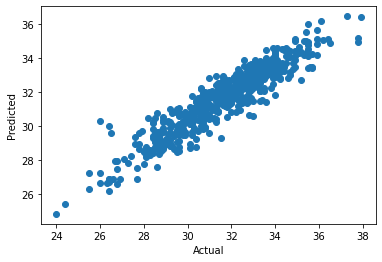

In [27]:
# checking out the differnce between actual and predicted values
plt.scatter(x = ytest_max,y = pred_final2)
plt.xlabel('Actual')
plt.ylabel('Predicted')

the above graph shows the difference between the actual value and the predicted value

In [ ]:
import pickle
filename = 'temperature_forcast.pkl'
pickle.dump(rfr3,open(filename,'wb'))

here we are dumping the model